# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [30]:
import pandas as pd
import re
from collections import defaultdict

# Load the dataset
data_path = '/content/cleaned_tweets.csv'
df = pd.read_csv(data_path)

# Inspect dataset columns
print("Dataset columns:", df.columns)

# Use the correct column name for text data
text_column = 'Text' if 'Text' in df.columns else None

if not text_column:
    raise ValueError("No suitable text column found in the dataset. Available columns: " + ', '.join(df.columns))

# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['cleaned_text'] = df[text_column].astype(str).apply(preprocess_text)

def generate_ngrams(text, n):
    words = text.split()
    return [tuple(words[i:i + n]) for i in range(len(words) - n + 1)]

# Count N-grams
bigram_counts = defaultdict(int)
trigram_counts = defaultdict(int)
word_counts = defaultdict(int)

for text in df['cleaned_text']:
    words = text.split()
    for word in words:
        word_counts[word] += 1
    for bigram in generate_ngrams(text, 2):
        bigram_counts[bigram] += 1
    for trigram in generate_ngrams(text, 3):
        trigram_counts[trigram] += 1

# Calculate bigram probabilities
bigram_probs = {bigram: count / word_counts[bigram[0]] for bigram, count in bigram_counts.items()}

# Print bigram and trigram frequencies
print("Bigram Frequencies:")
for bigram, count in sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{bigram}: {count}")

print("\nTrigram Frequencies:")
for trigram, count in sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{trigram}: {count}")

# Extract noun phrases using simple heuristic (assuming noun phrases are consecutive words)
def extract_noun_phrases(text):
    words = text.split()
    return [' '.join(words[i:i+2]) for i in range(len(words) - 1)]  # Simple heuristic for noun phrases

# Compute relative frequencies of noun phrases
noun_phrase_counts = defaultdict(int)
all_noun_phrases = []

for text in df['cleaned_text']:
    noun_phrases = extract_noun_phrases(text)
    all_noun_phrases.extend(noun_phrases)
    for phrase in noun_phrases:
        noun_phrase_counts[phrase] += 1

max_freq = max(noun_phrase_counts.values(), default=1)
noun_phrase_probs = {phrase: count / max_freq for phrase, count in noun_phrase_counts.items()}

# Create results table
result_df = pd.DataFrame(columns=list(noun_phrase_probs.keys()), index=df.index)

for idx, text in enumerate(df['cleaned_text']):
    text_noun_phrases = extract_noun_phrases(text)
    for phrase in text_noun_phrases:
        if phrase in noun_phrase_probs:
            result_df.at[idx, phrase] = noun_phrase_probs[phrase]

# Fill NaNs with 0
result_df = result_df.fillna(0)

# Display final table
print("\nRelative Probability Table:")
print(result_df.head())


Dataset columns: Index(['Tweet ID', 'Username', 'Text', 'Cleaned Text'], dtype='object')
Bigram Frequencies:
('artificial', 'intelligence'): 65
('machine', 'learning'): 21
('just', 'a'): 17
('the', 'growth'): 16
('growth', 'of'): 16
('of', 'monsta'): 16
('monsta', 'gt'): 16
('gt', 'vitaliar'): 16
('in', 'the'): 10
('intelligence', 'nah'): 9

Trigram Frequencies:
('the', 'growth', 'of'): 16
('growth', 'of', 'monsta'): 16
('of', 'monsta', 'gt'): 16
('monsta', 'gt', 'vitaliar'): 16
('artificial', 'intelligence', 'nah'): 9
('intelligence', 'nah', 'just'): 9
('nah', 'just', 'a'): 9
('just', 'a', 'beast'): 8
('a', 'beast', 'who'): 8
('just', 'a', 'monsta'): 8

Relative Probability Table:
   artificial intelligence  intelligence nah  nah just    just a   a beast  \
0                      1.0          0.138462  0.138462  0.261538  0.123077   
1                      1.0          0.000000  0.000000  0.000000  0.000000   
2                      1.0          0.000000  0.000000  0.000000  0.000000 

<ipython-input-30-b59d3743e755>:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_df = result_df.fillna(0)


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [1]:
# Write your code here

import pandas as pd

# Read the CSV file into a DataFrame
file_path = '/content/cleaned_tweets.csv'  # Replace 'your_file.csv' with your actual file path
df = pd.read_csv(file_path)

# Get only the first 100 records
num_records = 100
specific_records = df.head(num_records)



text_column = specific_records['Text'].tolist()

# Display the text column
print(text_column)






['Artificial intelligence? Nah, just a beast who predicts the growth of $MONSTA\n\n&gt; Vitali_AR:\n$PLTR $PLSX #XRPL #Blur $TENET $LOOP $DNX', '@Craptocracy @MarioNawfal God and an Super Artificial intelligence', 'Artificial Intelligence simplifies why reality is a simulation. Nothing travels faster than light, except bad news.', '0G Labs enables users to establish a unique framework which connects blockchain technology with artificial intelligence through its operation as the foremost decentralized AI operating system.\n\nDifferentiating characteristics define this project through the following… https://t.co/MUh3DAqR7p https://t.co/8OHgX6oosY', 'Soap Bubble- AI Generated #trending #science #texttovideoaifree #artificial_intelligence  https://t.co/mLR721gkmp via @YouTube', 'In Focus - Srijan Anand \n\nFrom an early age, Srijan was drawn to mathematics and problem-solving, which led him to IIT Kanpur and make a deep dive into Machine Learning. His ML journey began with IITK’s tech club

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Actual Dataset
documents = text_column

# Design a query
query = "An outstanding movie with a haunting performance and best character development"

# Step 1: Build the TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Step 2: Transform the query using the same vectorizer
query_vector = vectorizer.transform([query])

# Step 3: Calculate cosine similarity between the query and each document
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

# Step 4: Rank the documents based on cosine similarity
document_ranking = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

# Step 5: Print the results
print("Document Ranking:")
for index, similarity in document_ranking:
    print(f"Document {index + 1}: Similarity = {similarity:.4f}")
    print(documents[index])
    print("\n")


Document Ranking:
Document 8: Similarity = 0.1927
@LaraconIN @lucgiovanny With AI rapidly evolving, how can Filament PHP leverage machine learning to dynamically adjust database queries for optimal performance?

How can we efficiently handle large datasets in Filament without sacrificing performance?


Document 55: Similarity = 0.1382
@openGPUnetwork! OpenGPU's groundbreaking decentralized platform is leveling the playing field, providing unrestricted access to high-performance GPU resources and unleashing unprecedented innovation in AI and machine learning! https://t.co/6oKQJD2tH4


Document 2: Similarity = 0.1370
@Craptocracy @MarioNawfal God and an Super Artificial intelligence


Document 18: Similarity = 0.1296
@binance $SNAI One of the best artificial intelligence infrastructure is fully qualified for listing


Document 19: Similarity = 0.1218
AI Breakthroughs
Recent advancements in artificial intelligence have led to the development of advanced algorithms, enabling AI systems to 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [3]:
# Write your code here
!pip install gensim







In [5]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = '/content/cleaned_tweets.csv'  # Replace 'your_file.csv' with your actual file path
df = pd.read_csv(file_path)

# Get only the first 100 records
num_records = 100
specific_records = df.head(num_records)



text_column = specific_records['Text'].tolist()

# Display the text column
print(text_column)


['Artificial intelligence? Nah, just a beast who predicts the growth of $MONSTA\n\n&gt; Vitali_AR:\n$PLTR $PLSX #XRPL #Blur $TENET $LOOP $DNX', '@Craptocracy @MarioNawfal God and an Super Artificial intelligence', 'Artificial Intelligence simplifies why reality is a simulation. Nothing travels faster than light, except bad news.', '0G Labs enables users to establish a unique framework which connects blockchain technology with artificial intelligence through its operation as the foremost decentralized AI operating system.\n\nDifferentiating characteristics define this project through the following… https://t.co/MUh3DAqR7p https://t.co/8OHgX6oosY', 'Soap Bubble- AI Generated #trending #science #texttovideoaifree #artificial_intelligence  https://t.co/mLR721gkmp via @YouTube', 'In Focus - Srijan Anand \n\nFrom an early age, Srijan was drawn to mathematics and problem-solving, which led him to IIT Kanpur and make a deep dive into Machine Learning. His ML journey began with IITK’s tech club

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

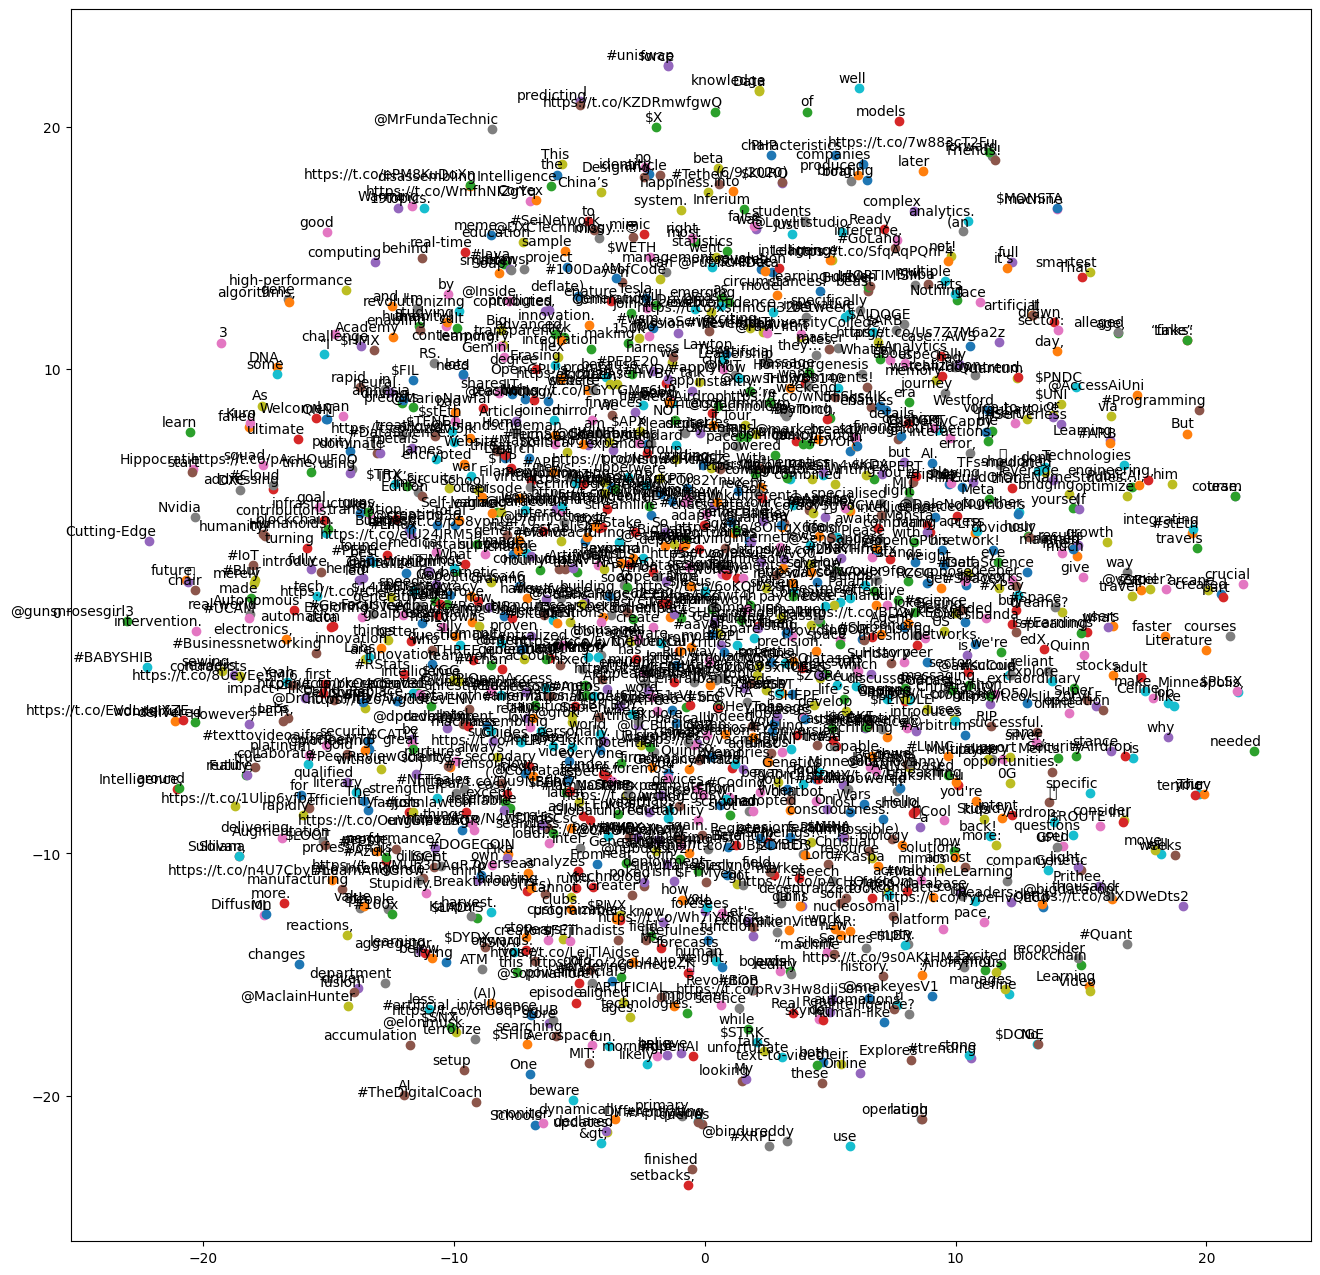

In [6]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Actual Dataset
reviews = text_column

# Tokenize the reviews
tokenized_reviews = [review.split() for review in reviews]

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

# Save the model (optional)
model.save("word2vec_model")

#New code
import numpy as np

def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)  # Convert to NumPy array

    tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")

    plt.show()

# Visualize the word embeddings
tsne_plot(model)



## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/Archana561/Archana_INFO5731_SPRING2025/blob/main/combined_tweets.csv



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer